In [1]:
import pandas as pd

In [2]:
def read_DB(db_path):
    '''
    function for reading database and parse it to dictionary of dataframes
    descOrigin is used for indexing and presenting the database entries in a understandable way for the user
    '''

    db_sh = pd.ExcelFile(db_path)
    sheets = db_sh.sheet_names
    db = pd.read_excel(db_path, sheet_name= sheets, index_col= 0)
    # add 
    for col in sheets:
        # Fill empty cells with NaN
        db[col] = db[col].fillna(db[col])
        if col == 'Types':
            db[col]['descOrigin'] = db[col]['Type'].astype(str) + ', ' + db[col]['Origin'].astype(str)
        elif col == 'References': 
            db[col]['authorYear'] = db[col]['Author'].astype(str) + ', ' + db[col]['Year'].astype(str)
        elif col == 'Country':
            db[col]['descOrigin'] = db[col]['Country'].astype(str) + ', ' + db[col]['City'].astype(str)  
        elif col == 'Region':
            pass
        elif col == 'Spartacus Material':
            db[col]['descOrigin'] = db[col]['Description'].astype(str) + '; ' + db[col]['Color'].astype(str) + '; ' + db[col]['Origin'].astype(str)    
        # Calculate U-values for roof and wall new columns u_value_wall and u_value_roof
        elif col == 'Spartacus Surface':
            db[col]['descOrigin'] = db[col]['Description'].astype(str) + ', ' + db[col]['Origin'].astype(str)
            for row in db['Spartacus Surface'].iterrows():
                id = row[0]
                SS_surf_sel = db['Spartacus Surface'].loc[id]
                if SS_surf_sel['Surface'] == 'Buildings':
                    resistance_bulk_w = 0
                    resistance_bulk_r = 0

                    for i in range(1,4):
                        surf_w = SS_surf_sel['w'+str(i)+'Material'].item()
                        thickness_w = SS_surf_sel['w'+str(i)+'Thickness'].item()
                        
                        surf_r = SS_surf_sel['r'+str(i)+'Material'].item()
                        thickness_r = SS_surf_sel['r'+str(i)+'Thickness'].item()

                        try:
                            Tc_w = db['Spartacus Material'].loc[surf_w, 'Thermal Conductivity']
                            resistance_w = thickness_w / Tc_w
                            resistance_bulk_w = resistance_bulk_w + resistance_w
                        except:
                            pass

                        try:
                            Tc_r = db['Spartacus Material'].loc[surf_r, 'Thermal Conductivity']
                            resistance_r = thickness_r / Tc_r
                            resistance_bulk_r = resistance_bulk_r + resistance_r

                        except:
                            print(id, i)
                    
                    u_value_w = 1/ resistance_bulk_w
                    u_value_r = 1/ resistance_bulk_r

                    
                    db['Spartacus Surface'].loc[id,'u_value_wall'] = u_value_w
                    db['Spartacus Surface'].loc[id,'u_value_roof'] = u_value_r

                    db['Spartacus Surface'].loc[id,'albedo_roof'] = db['Spartacus Material'].loc[SS_surf_sel['r1Material'], 'Albedo']
                    db['Spartacus Surface'].loc[id,'albedo_wall'] = db['Spartacus Material'].loc[SS_surf_sel['w1Material'], 'Albedo']

        else:
            db[col]['descOrigin'] = db[col]['Description'].astype(str) + ', ' + db[col]['Origin'].astype(str)

    db_sh.close() # trying this to close excelfile
    
    return db

In [3]:
db_path = r'C:\GitHub\suews_database_manager\data\database.xlsx'

In [4]:
db = read_DB(db_path)

In [11]:
db['Leaf Growth Power']

,General Type,Surface,Description,Origin,LeafGrowthPower1,LeafGrowthPower2,LeafOffPower1,LeafOffPower2,Ref,descOrigin
ID,,,,,,,,,,
321,24,Evergreen Tree,"Evergreen Tree, LaiEq = 1",Helsinki,0.04,0.0010,-1.50,0.0015,9015,"Evergreen Tree, LaiEq = 1, Helsinki"
322,24,Deciduous Tree,"Deciduous Tree, LaiEq = 1",Helsinki,0.04,0.0010,-1.50,0.0015,9015,"Deciduous Tree, LaiEq = 1, Helsinki"
323,24,Grass,"Grass, LaiEq = 1",Helsinki,0.04,0.0010,-1.50,0.0015,9015,"Grass, LaiEq = 1, Helsinki"
324,24,Evergreen Tree,"Evergreen Tree, LaiEq = 0",Vancouver,0.03,0.0005,0.03,0.0005,9054,"Evergreen Tree, LaiEq = 0, Vancouver"
325,24,Deciduous Tree,"Deciduous Tree, LaiEq = 0",Vancouver,0.03,0.0005,0.03,0.0005,9054,"Deciduous Tree, LaiEq = 0, Vancouver"
326,24,Grass,"Grass, LaiEq = 0",Vancouver,0.03,0.0005,0.03,0.0005,9054,"Grass, LaiEq = 0, Vancouver"


In [35]:
db_sh = pd.ExcelFile(db_path)
sheets = db_sh.sheet_names
db = pd.read_excel(db_path, sheet_name= sheets, index_col= 0)

In [22]:
# for col in sheets:
#     db[col] = db[col].fillna

a =list(db['Profiles'].iloc[1,5:-2])

a


[0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.05,
 0.05,
 0.05,
 0.05,
 0.04,
 0.04,
 0.04,
 0.04]

In [25]:
prof_df = pd.DataFrame(a)


<Axes: >

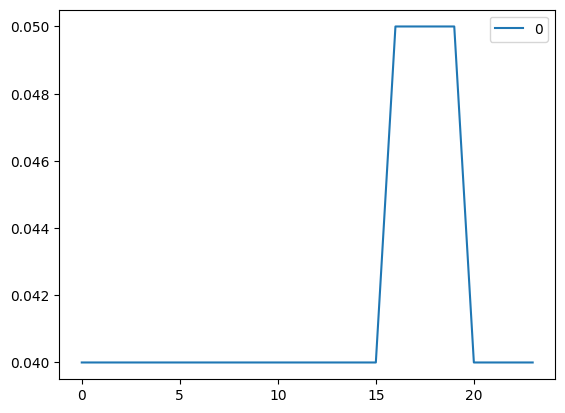

In [24]:
prof_df.plot()